### Predictive modelling of HSS Tool life using machine learning

#### Data Visualization using Juypter notebook

### Loading The Data into Jupyter Notebook

In [81]:
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"C:\Users\mohammed idris\Downloads\CNC Sample Programs.csv")

In [4]:
df.head()

,Feed,Depth_of_cut,Spindle_speed,Theoritical_Tool_Life,Practical_Tool_Life,Error
0,18,0.4,1300,13.74,13.21,0.53
1,19,0.4,1300,13.07,12.72,0.35
2,20,0.4,1300,12.41,12.96,-0.55
3,21,0.4,1300,12.91,12.23,0.68
4,22,0.4,1300,11.29,11.97,-0.68


In [5]:
# using Drop Command Technique 
## drop the unnamed and exp
#no feature df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
df.isnull().sum()

Feed                     0
Depth_of_cut             0
Spindle_speed            0
Theoritical_Tool_Life    0
Practical_Tool_Life      0
Error                    0
dtype: int64

In [7]:
# Copy the original dataframe without disturbing the original dataframe
df1 = df.copy() ###drop the null values

In [8]:
# drop the null values
df1.dropna(inplace=True)

In [9]:
df1.isnull().sum().sum()

0

In [10]:
# Describing the dataset 
df1.describe()

,Feed,Depth_of_cut,Spindle_speed,Theoritical_Tool_Life,Practical_Tool_Life,Error
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,20.000000,0.500000,1500.000000,9.022267,9.347200,-0.324933
std,1.423737,0.082199,142.373699,1.971163,2.066552,0.713375
min,18.000000,0.400000,1300.000000,4.590000,4.350000,-2.790000
25%,19.000000,0.400000,1400.000000,7.485000,7.885000,-0.665000
50%,20.000000,0.500000,1500.000000,9.180000,9.650000,-0.300000
75%,21.000000,0.600000,1600.000000,10.190000,10.835000,0.075000
max,22.000000,0.600000,1700.000000,13.740000,13.210000,1.610000


In [11]:
# Checking out the Corelation matrix
df1.corr()

,Feed,Depth_of_cut,Spindle_speed,Theoritical_Tool_Life,Practical_Tool_Life,Error
Feed,1.000000e+00,2.788296e-16,-1.932676e-16,-0.314530,-0.172374,-0.369751
Depth_of_cut,2.788296e-16,1.000000e+00,3.815158e-16,-0.349121,-0.234838,-0.284378
Spindle_speed,-1.932676e-16,3.815158e-16,1.000000e+00,-0.807849,-0.882720,0.324912
Theoritical_Tool_Life,-3.145300e-01,-3.491208e-01,-8.078490e-01,1.000000,0.938652,0.044003
Practical_Tool_Life,-1.723736e-01,-2.348384e-01,-8.827200e-01,0.938652,1.000000,-0.303229
Error,-3.697509e-01,-2.843783e-01,3.249125e-01,0.044003,-0.303229,1.000000


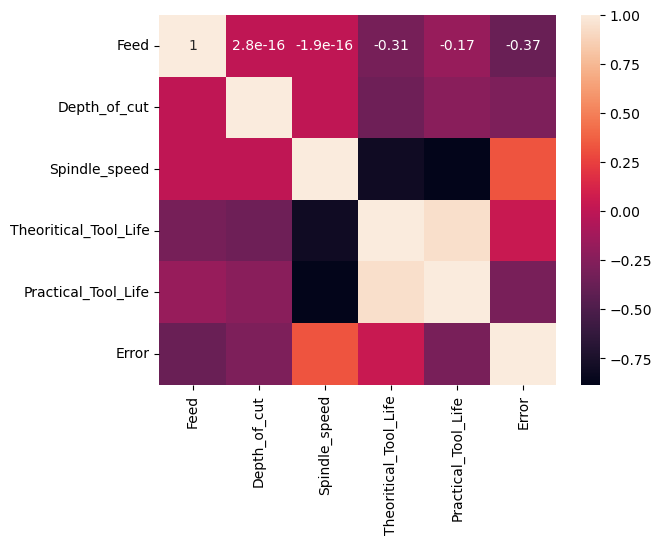

In [12]:
# Generating Heat Map Using Corelation matrix
sns.heatmap(df1.corr(),annot=True)
plt.show()

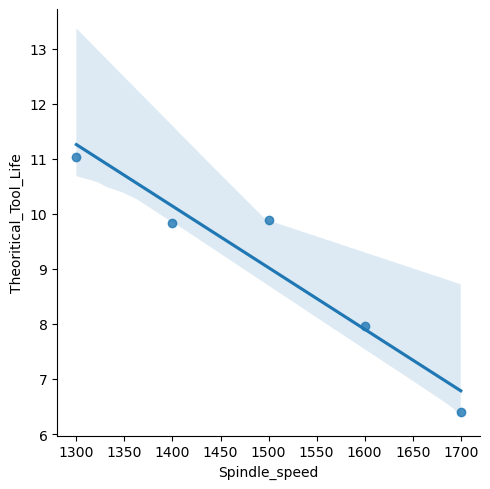

In [13]:
average_df=df1.groupby('Spindle_speed')['Theoritical_Tool_Life'].mean().reset_index()
sns.lmplot(x='Spindle_speed', y='Theoritical_Tool_Life', data=average_df)
plt.show()

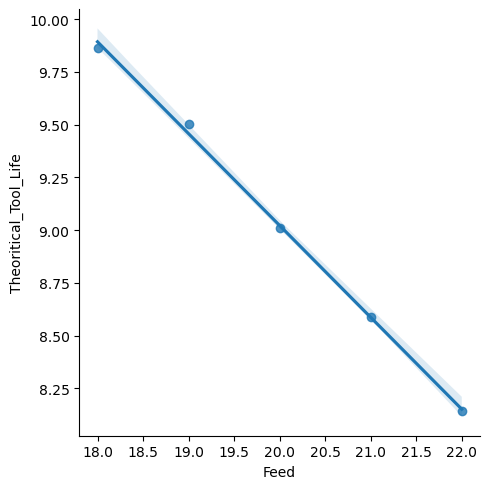

In [14]:
average_df=df1.groupby('Feed')['Theoritical_Tool_Life'].mean().reset_index()
sns.lmplot(x='Feed', y='Theoritical_Tool_Life', data=average_df)
plt.show()

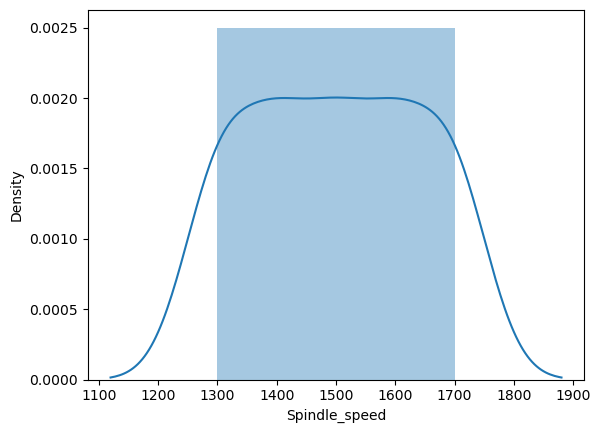

In [16]:
# visualize the distribution of cutting speed, feed, depth of cut & tool life
sns.distplot(df1['Spindle_speed'])
plt.show()

In [17]:
df1['Spindle_speed'].skew()

0.0

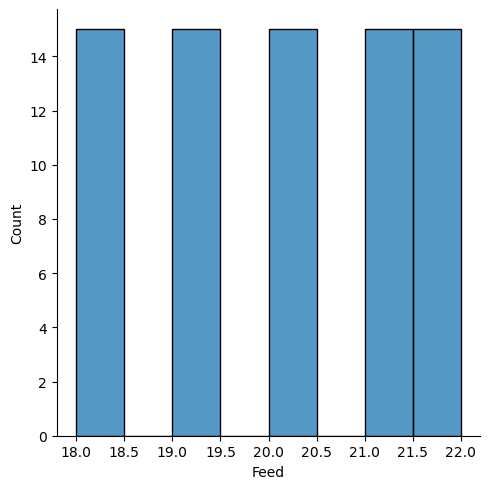

In [18]:
sns.displot(df1['Feed'])
plt.show()

In [19]:
df1['Feed'].skew()

0.0

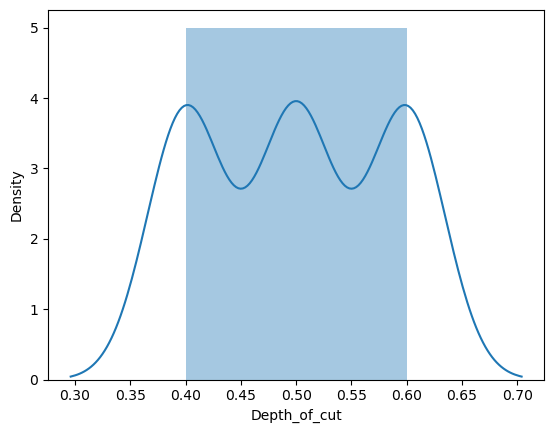

In [20]:
sns.distplot(df1['Depth_of_cut'])
plt.show()

In [238]:
df1['Depth_of_cut'].skew()

0.0

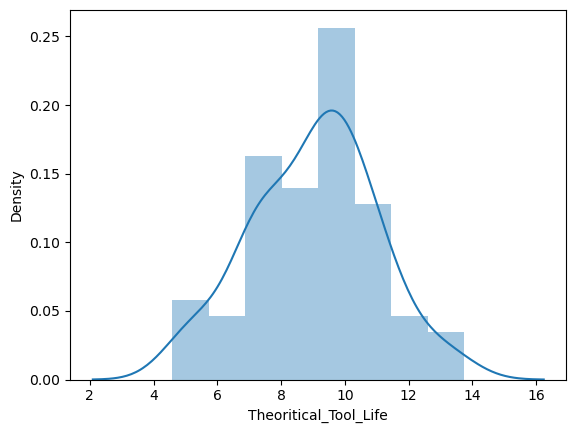

In [21]:
sns.distplot(df1['Theoritical_Tool_Life'])
plt.show()

In [240]:
df1['Theoritical_Tool_Life'].skew()

-0.09455885755873733

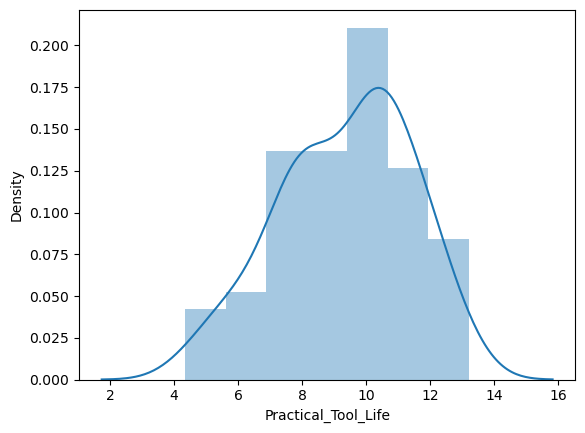

In [22]:
sns.distplot(df1['Practical_Tool_Life'])
plt.show()

In [23]:
df1['Practical_Tool_Life'].skew()

-0.3430900138005451

In [24]:
# Checking out the skewness for data to increase the accuracy of dataset
print('The skewness for feed feature before transformation is', df1['Feed'].skew())

The skewness for feed feature before transformation is 0.0


In [25]:
## Applied x****4 transformation to reduce the skewness of the feature
df1_power4=(df1['Feed']*df1['Feed']*df1['Feed']*df1['Feed'])

In [26]:
print('The skewness for feed feature before transformation is', df1_power4.skew())

The skewness for feed feature before transformation is 0.2245157131965554


In [27]:
### created the new dataframe after the transformation
df2=pd.DataFrame(df1_power4,columns=['Feed'])

In [247]:
df2.head()

,Feed
0,104976
1,130321
2,160000
3,194481
4,234256


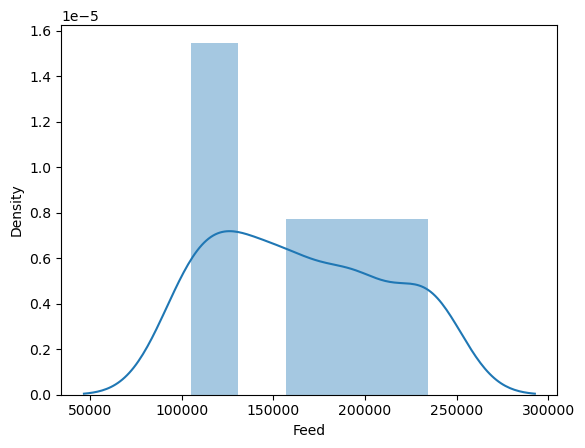

In [28]:
# converting the graph using skewness technique
### The distribution plot fpr feed feature after transformation 
sns.distplot(df2['Feed'])
plt.show()

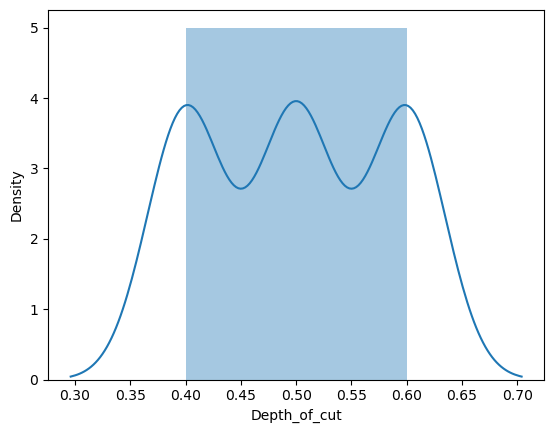

In [29]:
sns.distplot(df1['Depth_of_cut'])
plt.show()

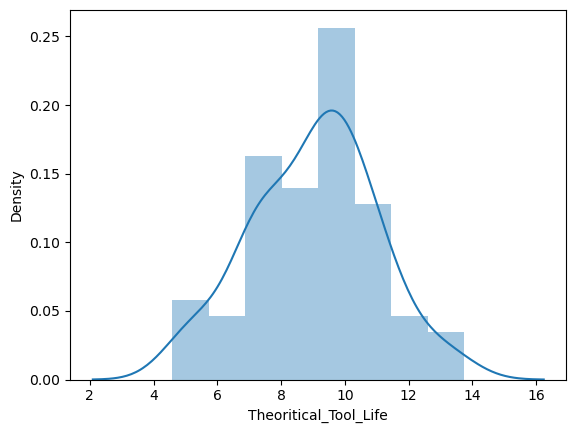

In [30]:
sns.distplot(df1['Theoritical_Tool_Life'])
plt.show()

In [31]:
print('The skewness for Tool Life feature before transformation is', df1['Theoritical_Tool_Life'].skew())

The skewness for Tool Life feature before transformation is -0.09455885755873733


In [32]:
print('The skewness for Tool Life feature after transformation is', np.log(df1['Theoritical_Tool_Life']).skew())

The skewness for Tool Life feature after transformation is -0.6993293318693949


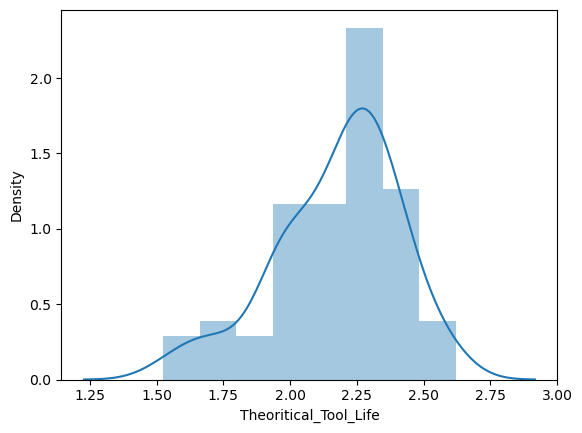

In [33]:
sns.distplot(np.log(df1['Theoritical_Tool_Life']))
plt.show()

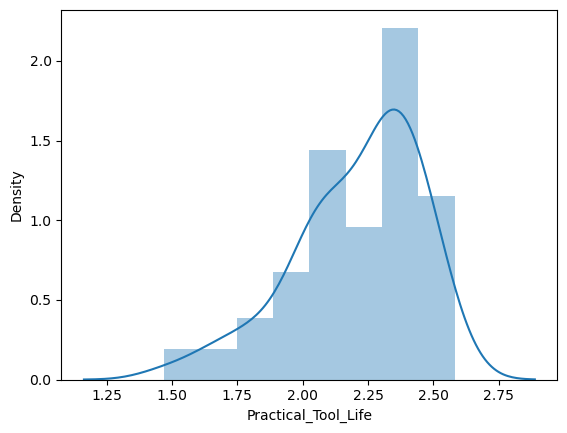

In [34]:
sns.distplot(np.log(df1['Practical_Tool_Life']))
plt.show()

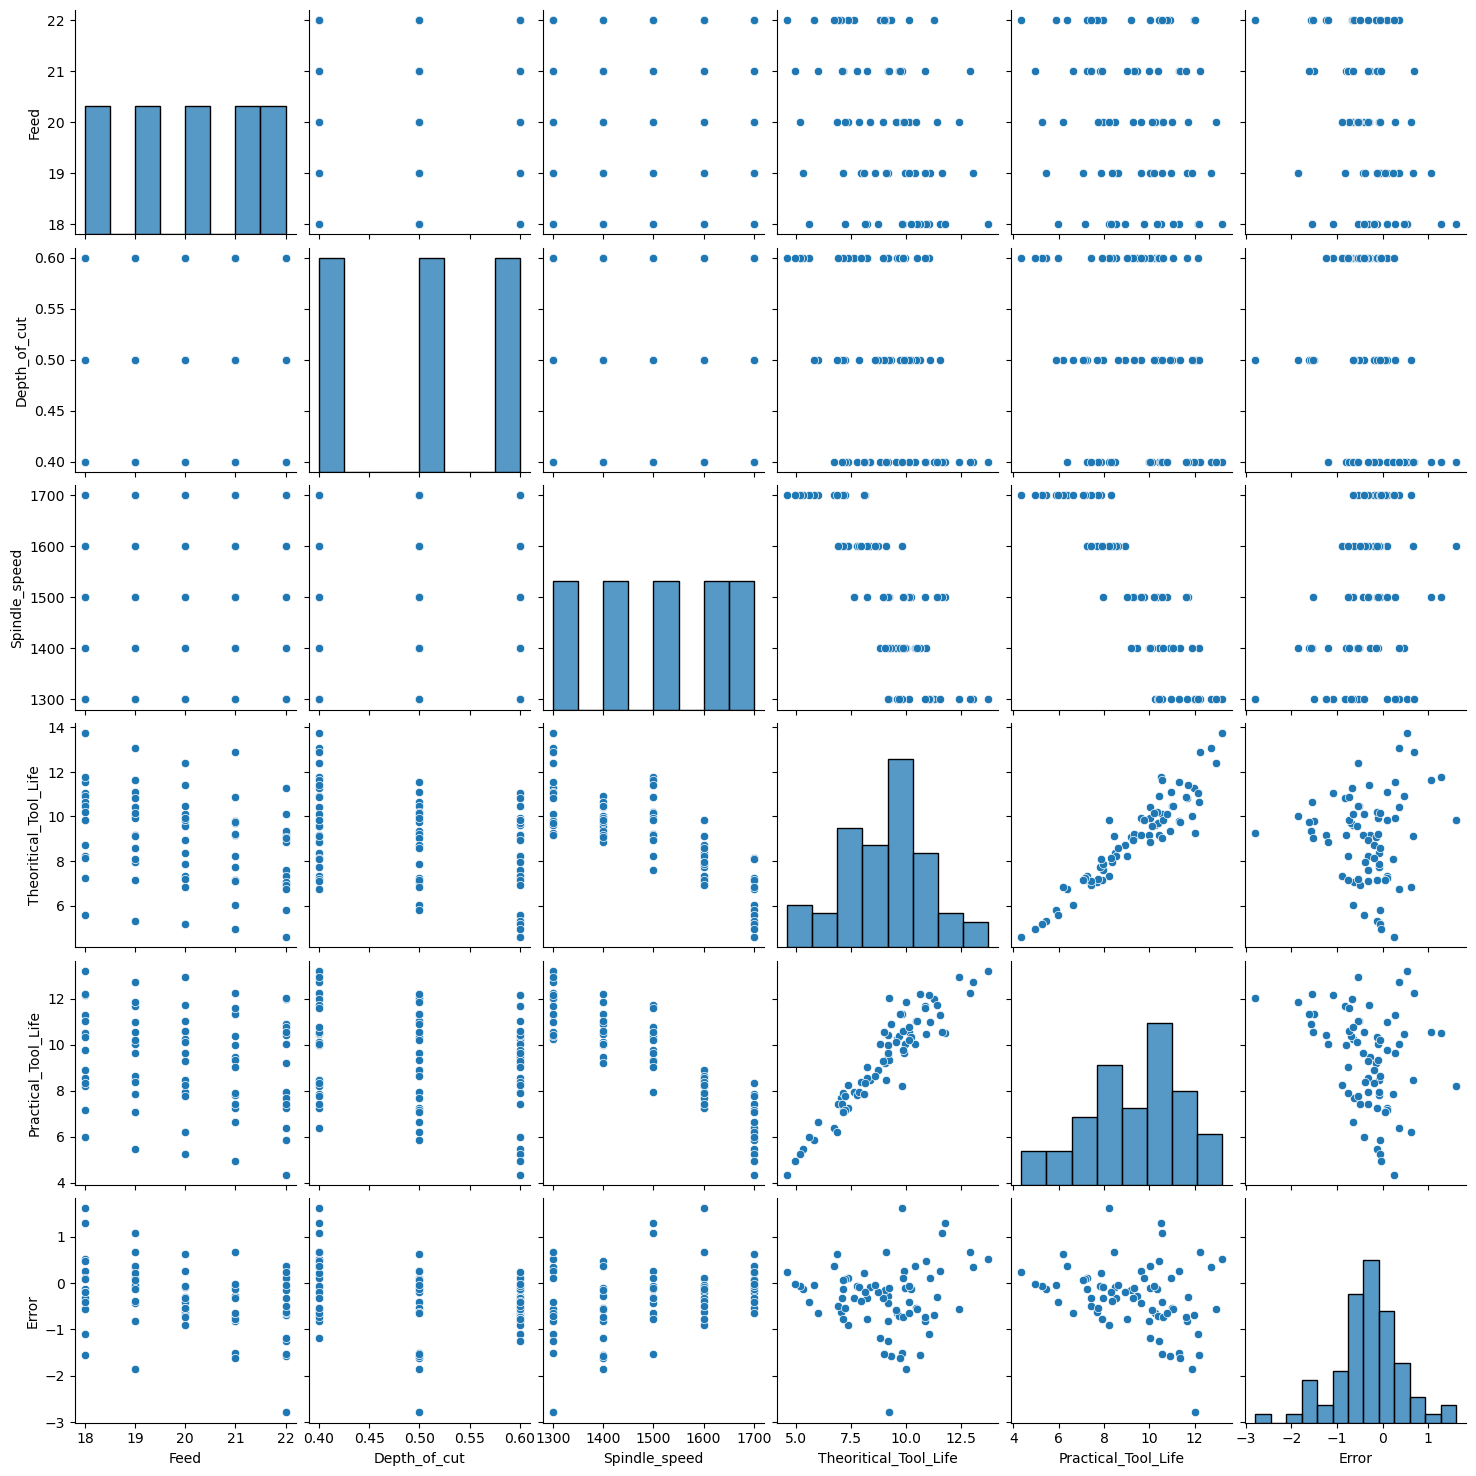

In [35]:
sns.pairplot(df1)

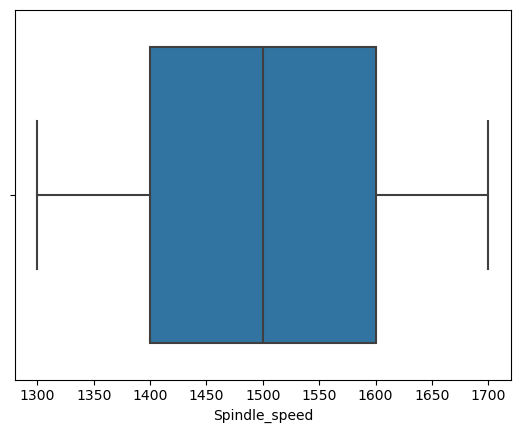

In [36]:
sns.boxplot(x=df['Spindle_speed'])
plt.show()

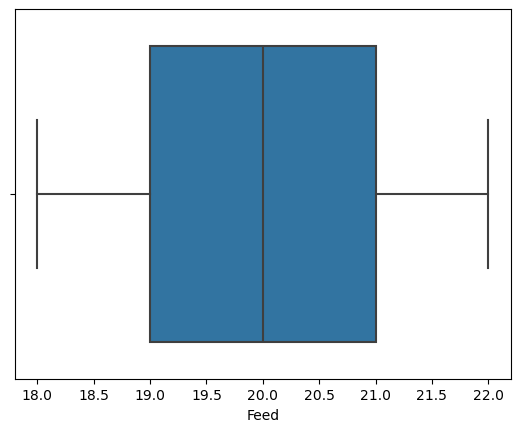

In [37]:
sns.boxplot(x=df['Feed'])
plt.show()

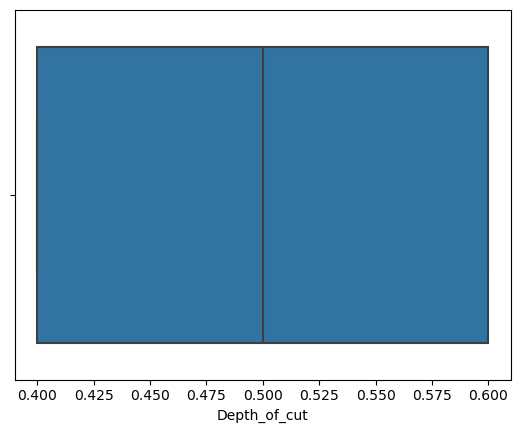

In [38]:
sns.boxplot(x=df['Depth_of_cut'])
plt.show()

In [43]:
#df1['Spindle_speed']=np.log(df['Spindle_speed'])

In [44]:
#df1['CFeed']=np.log(df['Feed'])

In [45]:
#df1['Depth_of_cut']=np.log(df['Depth_of_cut'])

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [47]:
## seperating independent features and dependent features
x=df1.drop(['Theoritical_Tool_Life'], axis=1)
y=df1['Theoritical_Tool_Life']

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

## LINEAR REGRESSSION

In [60]:
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)
y_pred_lin_reg=lin_reg.predict(x_test)
pd.DataFrame(y_pred_lin_reg)

,0
0,10.48
1,7.75
2,10.13
3,8.24
4,7.97
5,6.91
6,5.32
7,10.85
8,9.33
9,8.38


In [72]:
## DECISION TREE ALGORITHM
from sklearn.tree import DecisionTreeRegressor
Dec_reg=DecisionTreeRegressor()
Dec_reg.fit(x_train,y_train)
y_pred_dec_tree=Dec_reg.predict(x_test)
pd.DataFrame(y_pred_dec_tree)
mae_dec_tree= mean_absolute_error(y_test,y_pred_dec_tree)
mse_lin_reg= mean_squared_error(y_test,y_pred_lin_reg)
print('The mean absolute error is', mae_dec_tree)
print('The mean squared error is', mse_dec_tree)

The mean absolute error is 0.3784210526315791
The mean squared error is 0.2226947368421055


In [ ]:
#print('The mean squared error is', mean_squared_error(y_test,y_pred))

In [62]:
mse_dec_tree = mean_squared_error(y_test,y_pred_dec_tree)
print('The mean squared error of decision tree is', mean_squared_error(y_test,y_pred_dec_tree))

The mean squared error of decision tree is 0.2226947368421055


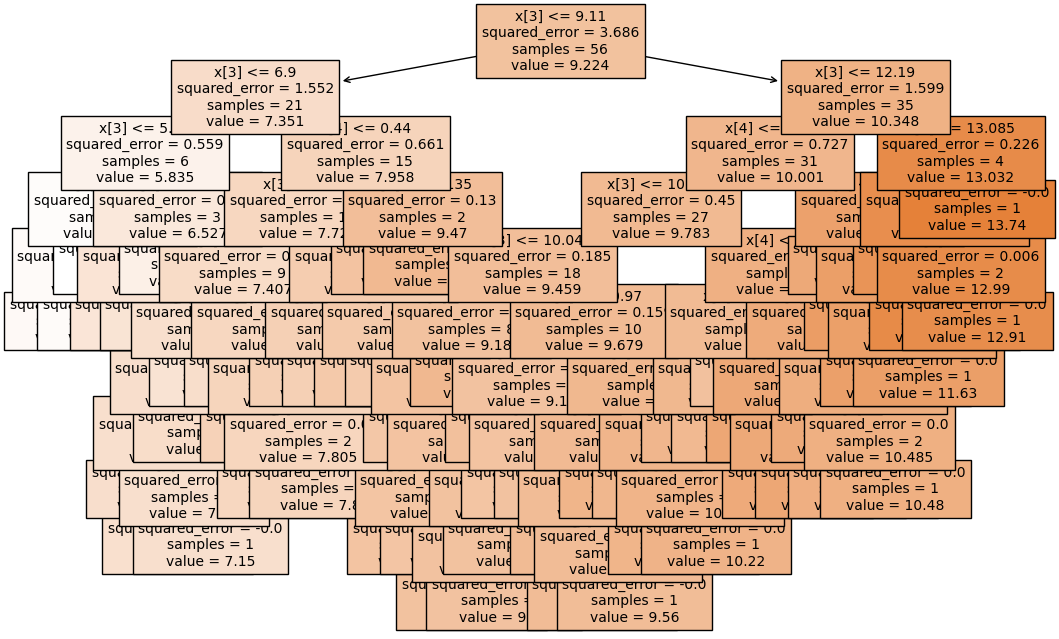

In [298]:
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(Dec_reg, fontsize=10, filled=True)
plt.show()

## GRADIENT BOOSTING ALGORITHM

In [64]:
from sklearn.ensemble import GradientBoostingRegressor
grad_boos = GradientBoostingRegressor()
grad_boos.fit(x_train, y_train)
y_pred_grad_boost = grad_boos.predict(x_test)  # Use x_test here
pd.DataFrame(y_pred_grad_boost)
mae_grad_boost = mean_absolute_error(y_test, y_pred_grad_boost)
print('The mean absolute error of gradient boost decision tree is',mae_grad_boost)
#print('The mean squared error is',mean_squared_error(y_test,y_pred))
mse_grad_boost=mean_squared_error(y_test,y_pred_grad_boost)
print('The mean squared error of gradient boost decision tree is',mean_squared_error(y_test,y_pred_grad_boost))

The mean absolute error of gradient boost decision tree is 0.2674156135954091
The mean squared error of gradient boost decision tree is 0.11283521292868096


## RANDOM FOREST VARIABLE

In [65]:
from sklearn.ensemble import RandomForestRegressor
ran_for=RandomForestRegressor()
ran_for.fit(x_train,y_train)
y_pred_ran_forest=ran_for.predict(x_test)
pd.DataFrame(y_pred)
mae_ran_for=mean_absolute_error(y_test,y_pred_ran_forest)
print('The mean absolute error of random forest algorithm is',mae_ran_for)
#print('The meansquared error is',mean_squared_error(y_test,y_pred))
mse_ran_for=mean_squared_error(y_test,y_pred_ran_forest)
print('The mean squared error of random forest is',mean_squared_error(y_test,y_pred_ran_forest))

The mean absolute error of random forest algorithm is 0.29554736842105295
The mean squared error of random forest is 0.155080615789475


## VISUALIZATION OF ERRORS

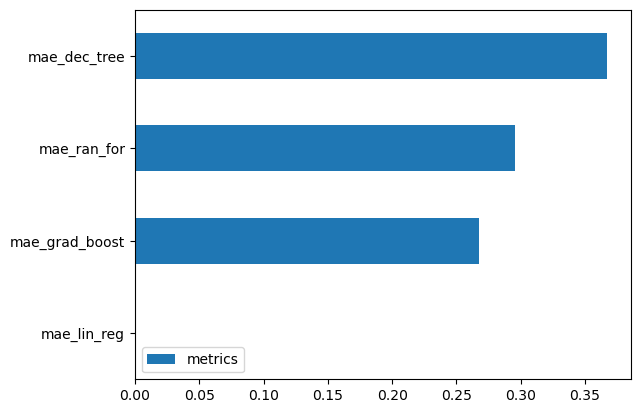

In [67]:
#mae_lin_reg = mean_absolute_error(y_test, lin_reg.predict(x_test))
#mae_dec_tree = mean_absolute_error(y_test, mae_dec_tree.predict(x_test))
#mae_ran_for = mean_absolute_error(y_test, mae_ran_for.predict(x_test))
#mae_grad_boost = mean_absolute_error(y_test, mae_grad_boost.predict(x_test))

df_metrics = pd.DataFrame([mae_lin_reg, mae_dec_tree, mae_ran_for, mae_grad_boost], 
                          columns=['metrics'], 
                          index=['mae_lin_reg', 'mae_dec_tree', 'mae_ran_for', 'mae_grad_boost'])
# Sort the DataFrame and create the bar plot
df_metrics.sort_values(by='metrics', ascending=True).plot(kind='barh')
plt.show()

### From the above horizontal bar graphs, it was observed that the mean absolute error of linear regression is less when compared to other algorithms

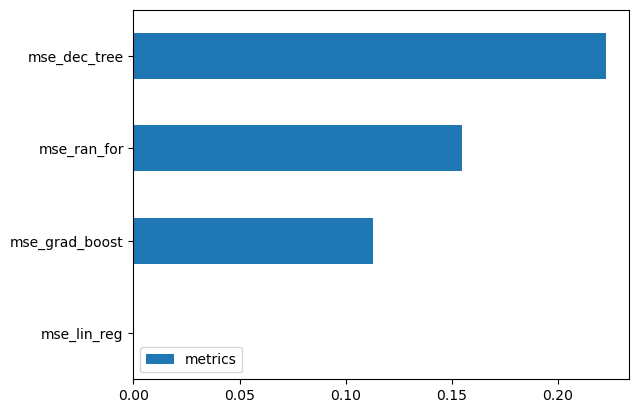

In [73]:
df_metrics=pd.DataFrame([mse_lin_reg,mse_dec_tree,mse_ran_for,mse_grad_boost],columns=['metrics'],index=['mse_lin_reg','mse_dec_tree','mse_ran_for','mse_grad_boost'])
df_metrics.sort_values(by=['metrics'],ascending=True).plot.barh()
plt.show()

In [83]:
print('The r2 score value of linear regression is', r2_score_lin_reg)
print('The r2 score value of decision tree is', r2_score_dec_tree)
print('The r2 score value of random forest regressor is', r2_score_ran_for)
print('The r2 score value of gradient boosting decision tree regressor is', r2_score_grad_boost)

The r2 score value of linear regression is 1.0
The r2 score value of decision tree is 0.9258235762862919
The r2 score value of random forest regressor is 0.9550826807240028
The r2 score value of gradient boosting decision tree regressor is 0.9673185764778434


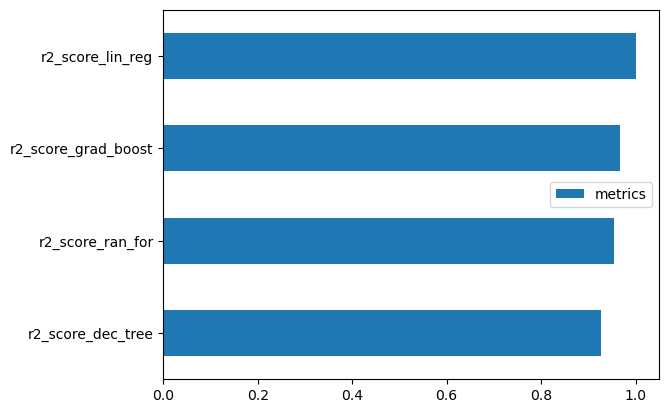

In [82]:
r2_score_lin_reg=r2_score(y_test,y_pred_lin_reg)
r2_score_dec_tree=r2_score(y_test,y_pred_dec_tree)
r2_score_ran_for=r2_score(y_test,y_pred_ran_forest)
r2_score_grad_boost=r2_score(y_test,y_pred_grad_boost)
df_metrics = pd.DataFrame([r2_score_lin_reg, r2_score_dec_tree, r2_score_ran_for, r2_score_grad_boost], 
                          columns=['metrics'], 
                          index=['r2_score_lin_reg', 'r2_score_dec_tree', 'r2_score_ran_for', 'r2_score_grad_boost'])
# Sort the DataFrame and create the bar plot
df_metrics.sort_values(by='metrics', ascending=True).plot(kind='barh')
plt.show()

In [75]:
mae_dec_tree

0.3784210526315791

In [79]:
r2_score(y_test,y_pred_lin_reg)

1.0

In [80]:
r2_score(y_test,y_pred_dec_tree)

0.9258235762862919

In [ ]:
r2_score(y_test,y_pred_r2_score_grad_boost)